# Ion excitation with a short Fourier-limited Gaussian laser pulse
CERN, 2021

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import json

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define constants for the numerical solution
Omega_val = 1.0
r_val = 0.1
Delta_0_val = 0.5

# Define the system of differential equations in terms of real and imaginary parts
def system(t, y, Omega, r, Delta_0):
    rho_11_re, rho_11_im, rho_12_re, rho_12_im, rho_21_re, rho_21_im, rho_22_re, rho_22_im = y
    
    drho_11_re_dt = 0.5 * Omega * (rho_12_im - rho_21_im)
    drho_11_im_dt = -0.5 * Omega * (rho_12_re - rho_21_re)
    
    drho_12_re_dt = 0.5 * Omega * rho_11_im - (r * t + Delta_0) * rho_12_im + 0.5 * Omega * rho_22_im
    drho_12_im_dt = -0.5 * Omega * rho_11_re + (r * t + Delta_0) * rho_12_re - 0.5 * Omega * rho_22_re
    
    drho_21_re_dt = -0.5 * Omega * rho_11_im + (r * t + Delta_0) * rho_21_im - 0.5 * Omega * rho_22_im
    drho_21_im_dt = 0.5 * Omega * rho_11_re - (r * t + Delta_0) * rho_21_re + 0.5 * Omega * rho_22_re
    
    drho_22_re_dt = 0.5 * Omega * (rho_21_im - rho_12_im)
    drho_22_im_dt = -0.5 * Omega * (rho_21_re - rho_12_re)
    
    return [drho_11_re_dt, drho_11_im_dt, drho_12_re_dt, drho_12_im_dt, drho_21_re_dt, drho_21_im_dt, drho_22_re_dt, drho_22_im_dt]

#

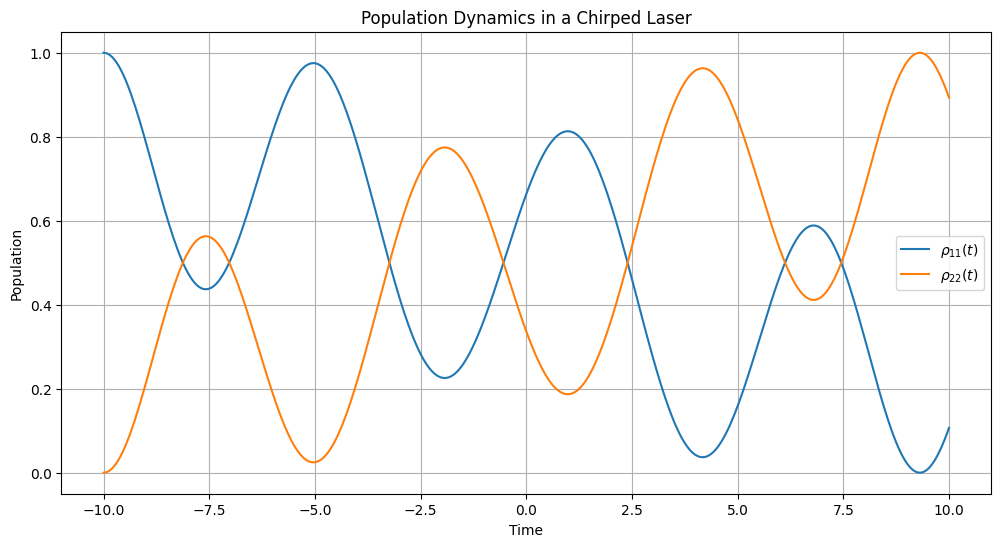

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def chirped_laser(t, y, Ω, Δ0, r):
    ρ11, ρ12_real, ρ12_imag, ρ22 = y
    ρ12 = ρ12_real + 1j * ρ12_imag
    dρ11_dt = -1j * (0.5 * Ω * ρ12 - 0.5 * Ω * np.conj(ρ12))
    dρ12_dt = -1j * (0.5 * Ω * ρ11 + (r * t + Δ0) * ρ12 - 0.5 * Ω * ρ22)
    dρ22_dt = -1j * (0.5 * Ω * np.conj(ρ12) - 0.5 * Ω * ρ12)
    return [dρ11_dt.real, dρ12_dt.real, dρ12_dt.imag, dρ22_dt.real]

# Parameters
Ω = 1.0  # Rabi frequency
Δ0 = 0.0  # Central detuning
r = 0.1   # Chirp rate

# Initial conditions: population in the ground state at t = -10
t0 = -10
y0 = [1, 0, 0, 0]

# Time points where solution is computed
t_span = (t0, 10)
t_eval = np.linspace(t0, 10, 400)

# Solve the system of differential equations
sol = solve_ivp(chirped_laser, t_span, y0, args=(Ω, Δ0, r), t_eval=t_eval, method='RK45')

# Extract the results
ρ11_sol = sol.y[0]
ρ12_sol = sol.y[1] + 1j * sol.y[2]
ρ22_sol = sol.y[3]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(sol.t, ρ11_sol, label=r'$\rho_{11}(t)$')
plt.plot(sol.t, ρ22_sol, label=r'$\rho_{22}(t)$')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Population Dynamics in a Chirped Laser')
plt.grid(True)
plt.show()


with widget

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define the function to solve the system of differential equations with given parameters
def solve_chirped_laser(Ω, Δ0, r):
    def chirped_laser(t, y, Ω, Δ0, r):
        ρ11, ρ12_real, ρ12_imag, ρ22 = y
        ρ12 = ρ12_real + 1j * ρ12_imag
        dρ11_dt = -1j * (0.5 * Ω * ρ12 - 0.5 * Ω * np.conj(ρ12))
        dρ12_dt = -1j * (0.5 * Ω * ρ11 + (r * t + Δ0) * ρ12 - 0.5 * Ω * ρ22)
        dρ22_dt = -1j * (0.5 * Ω * np.conj(ρ12) - 0.5 * Ω * ρ12)
        return [dρ11_dt.real, dρ12_dt.real, dρ12_dt.imag, dρ22_dt.real]

    # Initial conditions: population in the ground state at t = -10
    t0 = -10
    y0 = [1, 0, 0, 0]

    # Time points where solution is computed
    t_span = (t0, 10)
    t_eval = np.linspace(t0, 10, 400)

    # Solve the system of differential equations
    sol = solve_ivp(chirped_laser, t_span, y0, args=(Ω, Δ0, r), t_eval=t_eval, method='RK45')

    # Extract the results
    ρ11_sol = sol.y[0]
    ρ12_sol = sol.y[1] + 1j * sol.y[2]
    ρ22_sol = sol.y[3]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, ρ11_sol, label=r'$\rho_{11}(t)$')
    plt.plot(sol.t, ρ22_sol, label=r'$\rho_{22}(t)$')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Population Dynamics in a Chirped Laser')
    plt.grid(True)
    plt.show()

# Create the interactive plot with sliders for Ω, r, and Δ0
interact(solve_chirped_laser,
         Ω=widgets.FloatSlider(min=0, max=10.0, step=0.1, value=1.0, description=r'Ω'),
         Δ0=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0.0, description=r'Δ0'),
         r=widgets.FloatSlider(min=-5, max=5, step=0.001, value=0.1, description=r'$r$'));


interactive(children=(FloatSlider(value=1.0, description='Ω', max=10.0), FloatSlider(value=0.0, description='Δ…

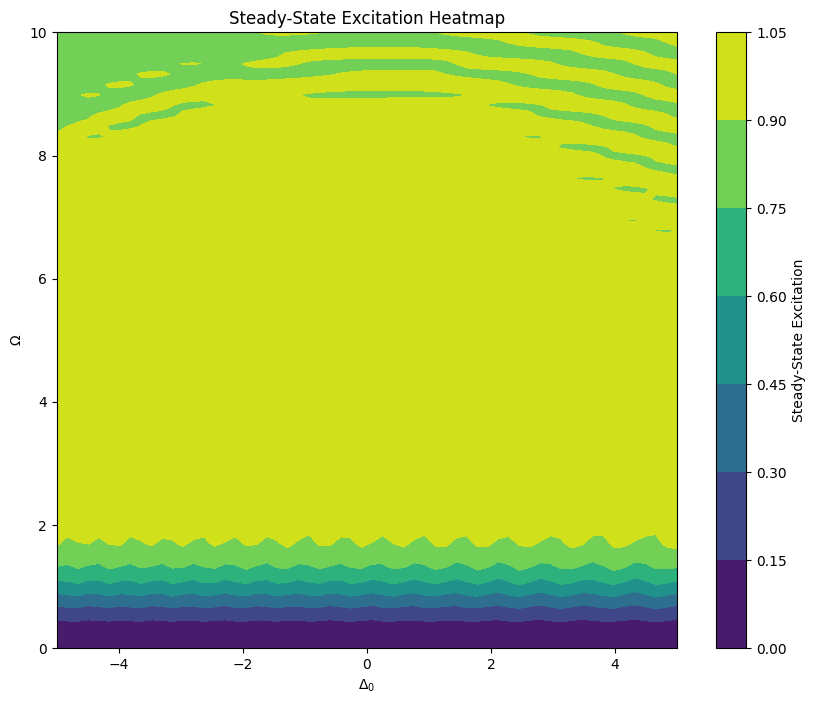

In [16]:
# Define the function to solve the system of differential equations with given parameters
def chirped_laser(t, y, Ω, Δ0, r):
    ρ11, ρ12_real, ρ12_imag, ρ22 = y
    ρ12 = ρ12_real + 1j * ρ12_imag
    dρ11_dt = -1j * (0.5 * Ω * ρ12 - 0.5 * Ω * np.conj(ρ12))
    dρ12_dt = -1j * (0.5 * Ω * ρ11 + (r * t + Δ0) * ρ12 - 0.5 * Ω * ρ22)
    dρ22_dt = -1j * (0.5 * Ω * np.conj(ρ12) - 0.5 * Ω * ρ12)
    return [dρ11_dt.real, dρ12_dt.real, dρ12_dt.imag, dρ22_dt.real]

# Initial conditions: population in the ground state at t = -10
t0 = -10
y0 = [1, 0, 0, 0]

# Time points where solution is computed
t_span = (t0, 10)
t_eval = np.linspace(t0, 10, 80)

# Define the function to get the steady-state excitation for given parameters
def get_steady_state_excitation(Δ0, Ω):
    r = 2  # Assuming a fixed value of r for simplicity
    sol = solve_ivp(chirped_laser, t_span, y0, args=(Ω, Δ0, r), t_eval=t_eval, method='RK45')
    ρ22_sol = sol.y[3]
    steady_state_value = np.mean(ρ22_sol[-8:])
    return steady_state_value  # Return the steady-state value

# Generate the parameter grid
Δ0_range = np.linspace(-5, 5, 60)
Ω_range = np.linspace(0, 10, 60)
Δ0s, Ωs = np.meshgrid(Δ0_range, Ω_range)

# Calculate the steady-state excitation for each pair of parameters
steady_state_excitation = np.vectorize(get_steady_state_excitation)(Δ0s, Ωs)

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.contourf(Δ0s, Ωs, steady_state_excitation, cmap='viridis')
plt.colorbar(label='Steady-State Excitation')
plt.xlabel(r'$\Delta_0$')
plt.ylabel(r'$\Omega$')
plt.title('Steady-State Excitation Heatmap')
plt.show()

with spontanous emission

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define the function to solve the system of differential equations with given parameters
def solve_chirped_laser(Ω, Δ0, r, γ):
    def chirped_laser(t, y, Ω, Δ0, r, γ):
        ρ11, ρ12_real, ρ12_imag, ρ22 = y
        ρ12 = ρ12_real + 1j * ρ12_imag
        dρ11_dt = -1j * (0.5 * Ω * ρ12 - 0.5 * Ω * np.conj(ρ12)) + γ * ρ22
        dρ12_dt = -1j * (0.5 * Ω * ρ11 + (r * t + Δ0) * ρ12 - 0.5 * Ω * ρ22) - 0.5 * γ * ρ12
        dρ22_dt = -1j * (0.5 * Ω * np.conj(ρ12) - 0.5 * Ω * ρ12) - γ * ρ22
        return [dρ11_dt.real, dρ12_dt.real, dρ12_dt.imag, dρ22_dt.real]

    # Initial conditions: population in the ground state at t = -10
    t0 = -10
    y0 = [1, 0, 0, 0]

    # Time points where solution is computed
    t_span = (t0, 10)
    t_eval = np.linspace(t0, 10, 400)

    # Solve the system of differential equations
    sol = solve_ivp(chirped_laser, t_span, y0, args=(Ω, Δ0, r, γ), t_eval=t_eval, method='RK45')

    # Extract the results
    ρ11_sol = sol.y[0]
    ρ12_sol = sol.y[1] + 1j * sol.y[2]
    ρ22_sol = sol.y[3]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, ρ11_sol, label=r'$\rho_{11}(t)$')
    plt.plot(sol.t, ρ22_sol, label=r'$\rho_{22}(t)$')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Population Dynamics in a Chirped Laser with Spontaneous Emission')
    plt.grid(True)
    plt.show()

# Create the interactive plot with sliders for Ω, r, Δ0, and γ
interact(solve_chirped_laser,
         Ω=widgets.FloatSlider(min=0, max=10.0, step=0.1, value=1.0, description=r'Ω'),
         Δ0=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0.0, description=r'Δ0'),
         r=widgets.FloatSlider(min=-5, max=5, step=0.001, value=0.1, description=r'$r$'),
         γ=widgets.FloatSlider(min=0, max=1.0, step=0.01, value=0.1, description=r'γ'));


interactive(children=(FloatSlider(value=1.0, description='Ω', max=10.0), FloatSlider(value=0.0, description='Δ…

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define the function to solve the system of differential equations with given parameters
def solve_chirped_laser(Ω, Δ0, r, γ):
    def chirped_laser(t, y, Ω, Δ0, r, γ):
        ρ11, ρ12_real, ρ12_imag, ρ22 = y
        ρ12 = ρ12_real + 1j * ρ12_imag
        dρ11_dt = -1j * (0.5 * Ω * ρ12 - 0.5 * Ω * np.conj(ρ12)) + γ * ρ22
        dρ12_dt = -1j * (0.5 * Ω * ρ11 + (r * t + Δ0) * ρ12 - 0.5 * Ω * ρ22) - 0.5 * γ * ρ12
        dρ22_dt = -1j * (0.5 * Ω * np.conj(ρ12) - 0.5 * Ω * ρ12) - γ * ρ22
        return [dρ11_dt.real, dρ12_dt.real, dρ12_dt.imag, dρ22_dt.real]

    # Initial conditions: population in the ground state at t = -10
    t0 = -10
    y0 = [1, 0, 0, 0]

    # Time points where solution is computed
    t_span = (t0, 10)
    t_eval = np.linspace(t0, 10, 400)

    # Solve the system of differential equations
    sol = solve_ivp(chirped_laser, t_span, y0, args=(Ω, Δ0, r, γ), t_eval=t_eval, method='RK45')

    # Extract the results
    ρ11_sol = sol.y[0]
    ρ12_sol = sol.y[1] + 1j * sol.y[2]
    ρ22_sol = sol.y[3]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, ρ11_sol, label=r'$\rho_{11}(t)$')
    plt.plot(sol.t, ρ22_sol, label=r'$\rho_{22}(t)$')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Population Dynamics in a Chirped Laser with Spontaneous Emission')
    plt.grid(True)
    plt.show()

# Create the interactive plot with sliders for Ω, r, Δ0, and γ
interact(solve_chirped_laser,
         Ω=widgets.FloatSlider(min=0, max=10.0, step=0.1, value=1.0, description=r'Ω'),
         Δ0=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0.0, description=r'Δ0'),
         r=widgets.FloatSlider(min=-5, max=5, step=0.001, value=0.1, description=r'$r$'),
         γ=widgets.FloatSlider(min=0, max=1.0, step=0.01, value=0.1, description=r'γ'));


interactive(children=(FloatSlider(value=1.0, description='Ω', max=10.0), FloatSlider(value=0.0, description='Δ…

solve normalized case. 

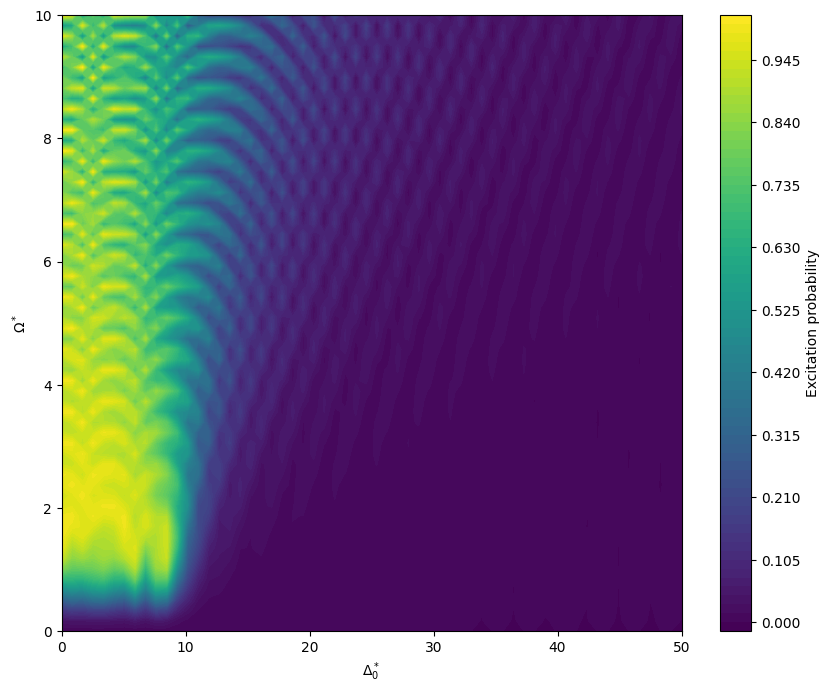

Saved.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import json

# Define the function to solve the system of differential equations with given parameters
def chirped_laser_star(tau, y, Ω_star, Δ0_star):
    ρ11, ρ12_real, ρ12_imag, ρ22 = y
    ρ12 = ρ12_real + 1j * ρ12_imag
    dρ11_dtau = -1j * (0.5 * Ω_star * ρ12 - 0.5 * Ω_star * np.conj(ρ12))
    dρ12_dtau = -1j * (0.5 * Ω_star * ρ11 + (tau + Δ0_star) * ρ12 - 0.5 * Ω_star * ρ22)
    dρ22_dtau = -1j * (0.5 * Ω_star * np.conj(ρ12) - 0.5 * Ω_star * ρ12)
    return [dρ11_dtau.real, dρ12_dtau.real, dρ12_dtau.imag, dρ22_dtau.real]

# Initial conditions: population in the ground state at tau = -10
tau0 = -10
y0 = [1, 0, 0, 0]

# Time points where solution is computed
tau_span = (tau0, 10)
tau_eval = np.linspace(tau0, 10, 100)

# Define the function to get the steady-state excitation for given parameters
def get_steady_state_excitation(Δ0_star, Ω_star):
    sol = solve_ivp(chirped_laser_star, tau_span, y0, args=(Ω_star, Δ0_star), t_eval=tau_eval,
                     method='LSODA')
    ρ22_sol = sol.y[3]
    steady_state_value = np.mean(ρ22_sol[-1])
    return steady_state_value  # Return the steady-state value

# Generate the parameter grid
Δ0_star_range = np.linspace(0, 50, 60)
Ω_star_range = np.linspace(0, 10, 60)
Δ0_stars, Ω_stars = np.meshgrid(Δ0_star_range, Ω_star_range)

# Calculate the steady-state excitation for each pair of parameters
steady_state_excitation = np.vectorize(get_steady_state_excitation)(Δ0_stars, Ω_stars)

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.contourf(Δ0_stars, Ω_stars, steady_state_excitation, cmap='viridis',levels=100)
plt.colorbar(label='Excitation probability')
plt.xlabel(r'$\Delta_0^*$')
plt.ylabel(r'$\Omega^*$')
plt.show()

with open('chirped_excitation_map.json', "w") as f:
    json.dump({
        'Omega_star_max': Ω_star_range[-1],
        'Detuning_star_max': Δ0_star_range[-1],
        'Excitation': steady_state_excitation.tolist()
    }, f, indent=1)

print('Saved.')


compare with delta of particles

In [20]:
import scipy.constants
import numpy as np
delta_range = np.linspace(-2e-4,2e-4,100)

p0c = 18644000000000.0
mass0 = 193733676421.31158
C_LIGHT=scipy.constants.c
hbar=scipy.constants.hbar
QELEM=scipy.constants.e


ion_excited_lifetime=76.6e-12


pc = p0c*(1.0+delta_range)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(mass0*mass0))
beta = np.sqrt(1-1/(gamma*gamma)) # ion beta

#laser parameters
chirp_rate = 1e14
laser_intensity=1e15 #saturation parameter is 7
laser_wavelength=1034.1703447721 *1e-9

I = 4.0*gamma*gamma * laser_intensity

hw0=230.823 # eV
ion_excitation_energy=hw0
OmegaTransition = ion_excitation_energy*QELEM/hbar
OmegaRabi = C_LIGHT*np.sqrt(6*np.pi)*np.sqrt(I)/np.sqrt(hbar*ion_excited_lifetime*(OmegaTransition**3))

OmegaRabi_star = OmegaRabi/chirp_rate
        
# Detuning from the ion transition resonance in the ion rest frame:        
cos_theta = 1
laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma;


DeltaDetuning = np.abs(OmegaTransition - laser_omega_ion_frame)
Detuning_star = DeltaDetuning/chirp_rate

In [21]:
Detuning_star

array([1.74365267, 1.72948869, 1.7153247 , 1.70116071, 1.68699672,
       1.67283274, 1.65866875, 1.64450476, 1.63034077, 1.61617679,
       1.6020128 , 1.58784881, 1.57368482, 1.55952084, 1.54535685,
       1.53119286, 1.51702887, 1.50286489, 1.4887009 , 1.47453691,
       1.46037293, 1.44620894, 1.43204495, 1.41788096, 1.40371698,
       1.38955299, 1.375389  , 1.36122501, 1.34706103, 1.33289704,
       1.31873305, 1.30456906, 1.29040508, 1.27624109, 1.2620771 ,
       1.24791311, 1.23374913, 1.21958514, 1.20542115, 1.19125716,
       1.17709318, 1.16292919, 1.1487652 , 1.13460121, 1.12043723,
       1.10627324, 1.09210925, 1.07794526, 1.06378128, 1.04961729,
       1.0354533 , 1.02128931, 1.00712533, 0.99296134, 0.97879735,
       0.96463336, 0.95046938, 0.93630539, 0.9221414 , 0.90797741,
       0.89381343, 0.87964944, 0.86548545, 0.85132146, 0.83715748,
       0.82299349, 0.8088295 , 0.79466551, 0.78050153, 0.76633754,
       0.75217355, 0.73800956, 0.72384557, 0.70968159, 0.69551

In [22]:
steady_state_excitation.tolist()

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.038429208237834175,
  0.046486786496554744,
  0.044204791910130464,
  0.0505784930389406,
  0.05071778786998919,
  0.043640178634123596,
  0.0375081263836011,
  0.05367490235466768,
  0.036799035034135376,
  0.05691581735979257,
  0.0497828768335203,
  0.022385554590731885,
  0.010119269755106316,
  0.0033513746648388115,
  0.00159712341257195,
  0.0011717972773040526,
  0.0004945486292446147,
  0.00027123855735809835,
  0.00037874434302443636,
  0.00021197535864044228,
  7.274806050131289e-05,
  0.0001724041609842512,
  0.000147418555652496,
  2.9491252053817548e-05,
